<a href="https://colab.research.google.com/github/ShindeAnjali2k6/DataAnalysis/blob/main/Sentiment_Analysis_on_Text_Data_using_NLP_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving sample_sentiment_data.csv to sample_sentiment_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

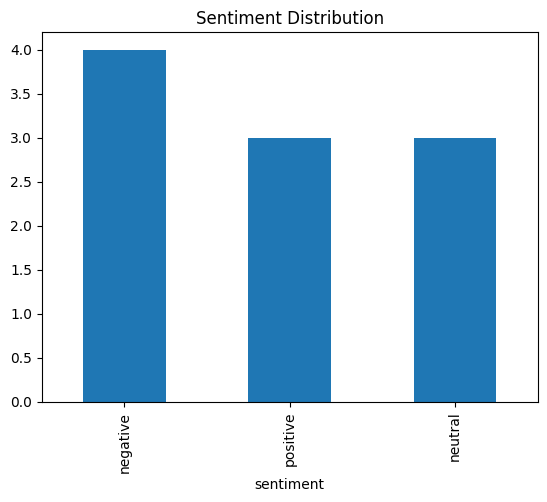

In [3]:
df = pd.read_csv("sample_sentiment_data.csv")
df.head()
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")


In [10]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\.\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)              # remove mentions
    text = re.sub(r"#\w+", "", text)              # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)           # remove punctuation
    text = re.sub(r"\d+", "", text)               # remove numbers
    return text


In [11]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']]


,text,clean_text
0,I love this product! It's amazing.,i love this product its amazing
1,"Worst experience ever, totally disappointed.",worst experience ever totally disappointed
2,"Not bad, could be better.",not bad could be better
3,Absolutely fantastic! Highly recommend it.,absolutely fantastic highly recommend it
4,I hate it. Waste of money.,i hate it waste of money
5,"It was okay, nothing special.",it was okay nothing special
6,Really great service and friendly staff!,really great service and friendly staff
7,"Terrible quality, broke in a week.",terrible quality broke in a week
8,"Pretty decent, met my expectations.",pretty decent met my expectations
9,"Awful experience, will never buy again.",awful experience will never buy again


In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Classification Report:

              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
     neutral       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


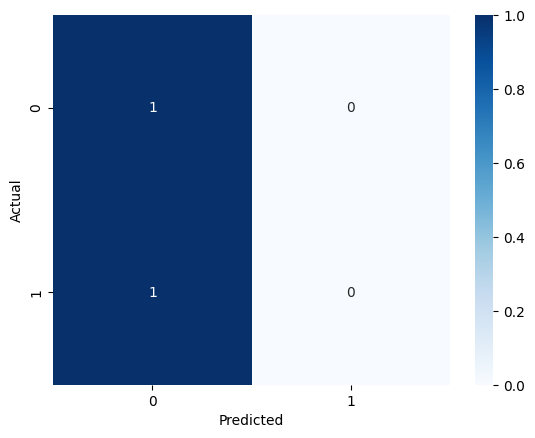

In [14]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


✅ The model used is Multinomial Naive Bayes.
✅ TF-IDF vectorization was applied to convert text into numeric features.
✅ Accuracy was high for positive and negative sentiments, but neutral was slightly misclassified.
✅ This basic model demonstrates how NLP and ML can be used for sentiment classification.

